# LOGISTIC REGRESSION ANALYTICAL
The goal of this exercise is to explore the ins and outs of logistic regression. In this part, you'll code a LOGREG from scratch

The versions carry different levels of difficulty.

We're working with two different datasets: 
###- Toy example
The file is under Data Science > Training > Exercises > DAtasets > BADS_T2_logreg.csv
###- From BigQuery
Sessions per day and whether or not it was a good day for 2017. We define a "good day" as one with more than 25 transactions.


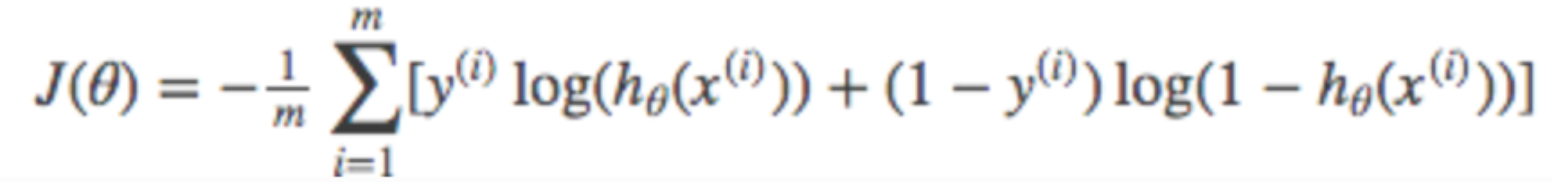

## VERSION 1
In this version you have to build from scratch the functions and solve any problems that may arise. Compare with the results from sklearn.

First, you have to import the datasets.

In [ ]:
# import from Google Drive

In [ ]:
# extract from BigQuery

Then you have to create the functions for both models.

In [ ]:
def logistic_regression_analytical_v1(x,y):

  return

In [ ]:
def logistic_regression_sklearn_v1(x,y):

  return

Finally, you have to compare both results. You can try different initializations.

In [ ]:
# compare results

## VERSION 2
In this version you'll have hints about the pieces of code that you have to wright.

First you have to import the datasets.

In [ ]:
# connect to Google Drive (nothing to be filled in here)
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

# import the file
df_csv = pd.read_csv()

In [ ]:
# authentication (nothing to be filled in here)
from google.colab import auth
auth.authenticate_user()

In [ ]:
%%bigquery --project dd-exp-2 df_bq
# write the query below
# you can explicitly name the columns within the query for simplicity


Then you have to fill the blanks for the functions for both models and all the intermediate functions.

In [ ]:
def minmax(data):
  data_minmax = 
  return data_minmax

In [ ]:
def logistic_regression_probability():
  y_probability = 
  return y_probability

In [ ]:
def logistic_regression_prediction(y_probability,threshold):
  y_hat = 
  return y_hat

In [ ]:
def logistic_regression_error():
  error = 
  return error.mean()

In [ ]:
def logistic_regression_plot():
  plt.scatter()
  plt.plot()
  plt.show()

In [ ]:
import numpy as np

def logistic_regression_sgd():
  
  # random parameters
  b0 = 
  b1 = 
  
  for i in range(epochs):
    for xi,yi in :
      y_hat = 
      b0 = 
      b1 = 

  return b0,b1

In [ ]:
def logistic_regression_analytical_v2():
  
  # normalize

  # calculate parameters

  # calculate probabilities
  
  # plot
  
  # calculate final error
  
  # do the predictions
  
  return {'b0':b0,
          'b1':b1,
          'error':error,
          'y_probability':y_probability,
          'y_hat':y_hat}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def logistic_regression_sklearn_v2():
  
  # create model
  logreg = LogisticRegression()
  
  # reshape
  x = 
  
  # fit the model
  logreg.fit()

  # parameters
  b0,b1 = 
    
  # probabilities
  y_probability = 

  # plot
  plt.scatter()
  plt.plot()
  plt.show()

  # predictions
  y_hat = 

  # error
  error = 
  
  return {'b0':b0,
          'b1':b1,
          'error':error,
          'y_probability':y_probability,
          'y_hat':y_hat}

Finally you have to compare the models.

In [ ]:
# comparte results
for i in []:
  print(logistic_regression_analytical_v2())
  print(logistic_regression_sklearn_v2())

## SOLUTION
Here you have the solution (try not to spoiler yourself).

In [ ]:
# connect to Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

# import the file
df_csv = pd.read_csv("/content/drive/MyDrive/Data Science/Training/Exercises/Datasets/BADS_T2_logreg.csv")

In [ ]:
# authentication
from google.colab import auth
auth.authenticate_user()

In [ ]:
%%bigquery --project dd-exp-2 df_bq
SELECT
COUNT(*) as x,
IF (SUM(totals.transactions)>25,1,0) AS y
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_2017*`
GROUP BY date

In [ ]:
import numpy as np

def minmax(data):
  data_minmax = np.array([(datai - data.min())/(data.max() - data.min()) for datai in data])
  return data_minmax

In [ ]:
def logistic_regression_proba(x,b0,b1):
  y_proba = 1/(1+np.exp(-(b0+b1*x)))
  return y_proba

In [ ]:
def logistic_regression_prediction(y_proba,threshold=0.5):
  y_hat = (y_proba>threshold)*1
  return y_hat

In [ ]:
def logistic_regression_error(y,y_proba):
  error = -(y*np.log(y_proba)+(1-y)*np.log(1-y_proba))
  return error.mean()

In [ ]:
import matplotlib.pyplot as plt

def logistic_regression_plot(x,y,y_proba):
  plt.scatter(x,y)
  plt.plot(sorted(x), sorted(y_proba))
  plt.show()

In [ ]:
def logistic_regression_sgd(x_minmax,y,alpha=0.001,epochs=1000):
  
  # random parameters
  b0 = np.random.rand()
  b1 = np.random.rand()
  
  for i in range(epochs):
    for xi,yi in zip(x_minmax,y):
      y_hat = logistic_regression_proba(xi,b0,b1)
      b0 = b0 + alpha * (yi - y_hat)
      b1 = b1 + alpha * (yi - y_hat) * xi

  return b0,b1

In [ ]:
def logistic_regression_analytical_sol(x,y,alpha=0.01,epochs=1000,threshold=0.5):
  
  # normalize
  x_minmax = minmax(x)

  # calculate parameters
  b0,b1 = logistic_regression_sgd(x_minmax,y,alpha,epochs)

  # estimate y
  y_proba = logistic_regression_proba(x_minmax,b0,b1)

  # plot
  logistic_regression_plot(x_minmax,y,y_proba)

  # error
  error = logistic_regression_error(y,y_proba)

  # predictions
  y_hat = logistic_regression_prediction(y_proba,threshold)

  return {'b0':b0,
          'b1':b1,
          'error':error,
          'y_proba':y_proba,
          'y_hat':y_hat}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def logistic_regression_sklearn_sol(x,y,epochs = 1000):
  
  # create model
  logreg = LogisticRegression(penalty='none',solver='sag',max_iter = epochs)
  
  # reshape
  x = np.array(minmax(x)).reshape(-1,1)
  
  # fit the model
  logreg.fit(x,y)

  # parameters
  b0,b1 = logreg.intercept_,logreg.coef_
    
  # probabilities
  y_probability = logreg.predict_proba(x)[:,1]

  # plot
  plt.scatter(x,y)
  plt.plot(x,y_probability)
  plt.show()

  # predictions
  y_hat = logreg.predict(x)

  # error
  error = log_loss(y,y_probability)
  
  return {'b0':b0,
          'b1':b1,
          'error':error,
          'y_probability':y_probability,
          'y_hat':y_hat}

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


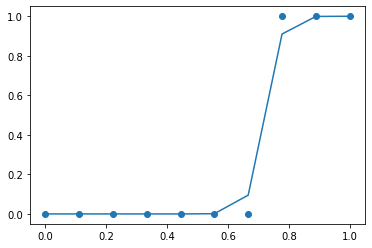

{'b0': array([-29.6575393]),
 'b1': array([[41.10548449]]),
 'error': 0.019630832410490403,
 'y_hat': array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1]),
 'y_probability': array([1.31793604e-13, 1.26892841e-11, 1.22174314e-09, 1.17631232e-07,
        1.13255830e-05, 1.08926852e-03, 9.50150535e-02, 9.09980191e-01,
        9.98973598e-01, 9.99989329e-01])}

In [ ]:
logistic_regression_sklearn_sol(df_csv.x,df_csv.y)

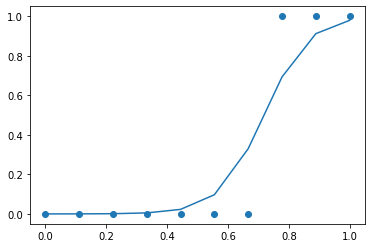

{'b0': -9.84472058685247,
 'b1': 13.704295236276117,
 'error': 0.10118664070624753,
 'y_hat': array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1]),
 'y_proba': array([5.30235920e-05, 2.43044941e-04, 1.11329014e-03, 5.08368531e-03,
        2.28894721e-02, 9.69814622e-02, 3.29925117e-01, 6.92998608e-01,
        9.11885327e-01, 9.79358106e-01])}

In [ ]:
logistic_regression_analytical_sol(df_csv.x,df_csv.y,epochs=10000)

# LOGISTIC REGRESSION KERAS
The goal of this exercise is to explore the ins and outs of logistic regression. In this part, you'll use Keras with the proper activation function.

The versions carry different levels of difficulty.

We're working with two different datasets: 
###- Toy example
The file is under Data Science > Training > Exercises > Datasets > BADS_T2_logreg.csv
###- From BigQuery
Sessions per day and whether or not it was a good day for 2017. We define a "good day" as one with more than 25 transactions.


## VERSION 1
In this version you have to build from scratch the functions and solve any problems that may arise. Compare with the results from sklearn.

In [ ]:
def logistic_regression_keras_v1():
    
  return

## VERSION 2
In this version you'll have hints about the pieces of code that you have to wright.

In [ ]:
import keras

def logistic_regression_keras(x,y,alpha=,epochs=,batch_size=):
  
  # minmax
  x_minmax = 

  # model
  modelo = keras.Sequential([])

  # training
  modelo.compile(
      optimizer =,
      loss = 
  )
  
  # fit
  modelo.fit()

  # coefficients
  b0,b1 = 
  
  # final error
  error = 

  # plot
  logistic_regression_plot()
  
  return {'b0':b0,'b1':b1,'error':error}

## SOLUTION
Here you have the solution (try not to spoiler yourself).

In [ ]:
import keras

def logistic_regression_keras(x,y,alpha=0.01,epochs=1000,batch_size=32):
  
  # minmax
  x_minmax = minmax(x)

  # model
  modelo = keras.Sequential([keras.layers.Dense(
      1,
      input_shape=(1,),
      activation='sigmoid')
  ])

  # training
  modelo.compile(
      optimizer = keras.optimizers.SGD(learning_rate=alpha),
      loss = 'binary_crossentropy'
  )
  
  # fit
  modelo.fit(x_minmax,y,epochs=epochs,batch_size=batch_size,verbose=0)

  # coefficients
  b0,b1 = modelo.get_weights()[1][0],modelo.get_weights()[0][0][0]
  
  # final error
  error = modelo.history.history['loss'][-1]

  # plot
  logistic_regression_plot(x,y,modelo.predict(x_minmax)[:,0])
  
  return {'b0':b0,'b1':b1,'error':error}

# LOGISTIC REGRESSION METRICS AND SAMPLING
The goal of this exercise is to explore the ins and outs of logistic regression. In this part, you will test the different methods for dealing with unbalanced samples.

We're working with the following datasets: 

###- Fixed GA sample
The file named BADS_T2_logreg_sampling.csv within the Datasets folder in Drive.

###- From BigQuery
(TODO: get a better dataset)

## VERSION 1

First, you have to import the dataset.

Here, you have to perform some preprocessing stuff in order to prepare the dataset.

Then, you have to prepare a function to perform different sampling techniques and return a simple partition train / test (80-20) for each one.

In [ ]:
def sampling():

  return

After that, you have to prepare a function to evaluate a model with different evaluation metrics and store the results (and the specs of the model).

In [ ]:
def metrics():

  return

Last, you have to use this functions to apply different sampling techniques and different metrics to the datasets and return both a Data Frame and a chart to show the results.

## VERSION 2

In [ ]:
# connect to Google Drive
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
import pandas as pd
df = pd.read_csv()

In [ ]:
# SPLIT DATA FRAME

# X, y

# train, test

In [ ]:
def preprocessing(X_train,X_test):

  # nulls

  # categorical variables

  # normalization

  return X_train, X_test

In [ ]:
def sampling(X_train):

  # over sampling

  # under sampling

  # smote
  
  return

In [ ]:
def models(X_train,y_train):

  # without weight

  # with weight

  return

In [ ]:
def metrics(model,X_test,y_test):

  # balanced accuracy

  # F1 score

  # Average precision

  # ROC AUC

  return

In [ ]:
# final dataframe

# plot results

## SOLUTION

In [ ]:
# connect to Google Drive
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Data Science/Training/Exercises/Datasets/BADS_T2_logreg_sampling.csv")

In [ ]:
# DIVIDE X,Y
X,y = df.iloc[:,:-1].copy(),df.iloc[:,-1].copy()

In [ ]:
from sklearn.model_selection import train_test_split

# TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
# NULLS
X_train, X_test = X_train.fillna(0), X_test.fillna(0)

In [ ]:
# CATEGORICAL
from sklearn.preprocessing import OneHotEncoder
oneHot = OneHotEncoder(handle_unknown='ignore').fit(X_train)
X_train, X_test = oneHot.transform(X_train), oneHot.transform(X_test)

In [ ]:
# NORMALIZATION
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)
X_train, X_test = normalizer.transform(X_train), normalizer.transform(X_test)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

def get_samples(X_train,y_train):
  
  ros = RandomOverSampler(sampling_strategy = 'minority')
  rus = RandomUnderSampler(sampling_strategy = 'majority')
  sm = SMOTE()

  X_train_over,y_train_over = ros.fit_resample(X_train,y_train)
  X_train_under, y_train_under = rus.fit_resample(X_train, y_train) 
  X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

  datasets = {'train':[X_train,y_train],
            'over':[X_train_over,y_train_over],
            'under':[X_train_under,y_train_under],
            'SMOTE':[X_train_smote,y_train_smote]}

  return datasets

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

def get_metrics(y,y_proba,y_hat):
  
  bas = balanced_accuracy_score(y, y_hat)
  f1 = f1_score(y,y_hat)
  aps = average_precision_score(y, y_proba)
  roc = roc_auc_score(y, y_proba)

  return [bas,f1,aps,roc]

In [ ]:
def get_results(models,datasets,X_test,y_test):
  results = []
  for model_name,model in models.items():
    for sampling,dataset in datasets.items():
      # FIT
      model.fit(dataset[0],dataset[1])
      # PREDICT
      y_proba = model.predict_proba(X_test)[:,1]
      y_hat = model.predict(X_test)
      # EVALUATE
      metrics = get_metrics(y_test,y_proba,y_hat)
      # STORE RESULTS
      results.append([model_name,sampling,metrics])
  
  # FORMAT
  results = pd.DataFrame(results)
  results = pd.concat([results.iloc[:,0:2],results.iloc[:,2].apply(pd.Series)],axis=1)
  results.columns = ['model','sampling','bas','f1','aps','roc']
  
  return results

In [ ]:
# MODELS
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none', solver='sag',max_iter=1000)
logreg_balanced = LogisticRegression(penalty='none', solver='sag',max_iter=1000,class_weight='balanced')

In [ ]:
datasets = get_samples(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
models = {'logreg': logreg,
          'logreg_balanced': logreg_balanced}

In [ ]:
results = get_results(models,datasets,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
results

,model,sampling,bas,f1,aps,roc
0,logreg,train,0.601597,0.287603,0.375084,0.981914
1,logreg,over,0.683158,0.388980,0.373877,0.981618
2,logreg,under,0.955153,0.299454,0.334599,0.980308
3,logreg,SMOTE,0.683186,0.389782,0.373578,0.981503
4,logreg_balanced,train,0.642176,0.339972,0.355037,0.981345
5,logreg_balanced,over,0.683565,0.389963,0.374002,0.981553
6,logreg_balanced,under,0.955159,0.299490,0.335394,0.980339
7,logreg_balanced,SMOTE,0.682389,0.388293,0.373983,0.981551
